In [ ]:
import sys
sys.path.insert(0, '../scripts/')

from itertools import count
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from utils import *

import seaborn as sns
from tqdm import tqdm

import scipy as sp

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score, mean_squared_error

from xgboost import plot_importance
import xgboost as xgb
from xgboost import XGBClassifier

color = sns.color_palette()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv('../data/denver_dataset_milestone3.csv', index_col=0)

In [ ]:
df

,18-59,mean_household_income,built 1995 or later,OTHER,mobile_home_pct,annual_births_per_resident,farm_score,luxury_communities_score,CONDO,property_crime_rate,bathfull,small_apt_buildings_pct,standardized_test_score_percentile,MULTI_FAMILY,bedrooms,list_date,sale_date,rex_property_id,latitude,longitude
0,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,4,2016-06-30,2016-08-12,207973152,39.61454,-104.72075
1,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,4,2019-04-26,2019-05-29,207973152,39.61454,-104.72075
4,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,2,0.802568,81.596980,False,5,2020-06-26,2020-08-10,208397574,39.61368,-104.72888
5,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,3,2017-04-21,2017-05-15,207998741,39.62276,-104.72723
6,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,4,0.802568,81.596980,False,4,2017-06-16,2017-07-14,207964420,39.62257,-104.72502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277545,0.623831,108207,3.015682,False,0.422195,0.016525,100,16.930720,True,19.415404,2,0.000000,81.854093,False,2,2018-05-18,2018-06-28,352759060,39.90318,-105.05226
277548,0.541232,78117,22.450889,False,8.840037,0.018905,0,50.545896,False,0.000000,1,5.051450,42.274687,False,3,2020-09-08,2100-01-01,121948410,40.58694,-104.74366
277549,0.519823,118127,40.666667,False,9.638889,0.008756,0,26.129220,False,8.233059,4,0.527778,74.072710,False,4,2017-05-31,2100-01-01,122775824,40.19702,-105.02302
277550,0.511367,112043,27.410359,False,2.788845,0.009153,100,25.255845,False,11.689526,1,0.876494,60.597145,False,4,2017-06-02,2100-01-01,93936156,39.33200,-104.66001


In [ ]:
df[df.isna().any(axis=1)]

,18-59,mean_household_income,built 1995 or later,OTHER,mobile_home_pct,annual_births_per_resident,farm_score,luxury_communities_score,CONDO,property_crime_rate,bathfull,small_apt_buildings_pct,standardized_test_score_percentile,MULTI_FAMILY,bedrooms,list_date,sale_date,rex_property_id,latitude,longitude
928,0.554730,169961,69.007545,False,0.000000,0.022093,100,9.118959,False,9.024745,5,0.580383,64.689384,False,5,2019-10-18,2019-12-09,93957040,NaN,NaN
930,0.554730,169961,69.007545,False,0.000000,0.022093,100,9.118959,False,9.024745,4,0.580383,64.689384,False,5,2016-10-11,2017-07-07,93957050,NaN,NaN
1090,0.554730,169961,69.007545,False,0.000000,0.022093,100,9.118959,False,9.024745,3,0.580383,64.689384,False,3,2020-07-23,2020-08-17,93956654,NaN,NaN
1096,0.554730,169961,69.007545,False,0.000000,0.022093,100,9.118959,False,9.024745,2,0.580383,64.689384,False,3,2019-11-05,2019-12-10,93956646,NaN,NaN
1134,0.554730,169961,69.007545,False,0.000000,0.022093,100,9.118959,False,9.024745,2,0.580383,64.689384,False,3,2017-03-29,2017-03-29,251588311,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277491,0.522957,89748,15.323246,False,14.580468,0.010608,100,35.596212,False,0.000000,2,0.000000,67.328799,False,3,2018-08-01,2019-03-15,95480350,NaN,NaN
277495,0.522957,89748,15.323246,False,14.580468,0.010608,100,35.596212,False,0.000000,2,0.000000,67.328799,False,2,2017-10-10,2018-01-29,95480264,NaN,NaN
277496,0.522957,89748,15.323246,False,14.580468,0.010608,100,35.596212,False,0.000000,2,0.000000,67.328799,False,2,2020-09-30,2100-01-01,95480264,NaN,NaN
277500,0.522957,89748,15.323246,False,14.580468,0.010608,100,35.596212,False,0.000000,1,0.000000,67.328799,False,2,2016-07-28,2016-08-17,95480173,NaN,NaN


In [ ]:
df = df.dropna()

In [ ]:
df

,18-59,mean_household_income,built 1995 or later,OTHER,mobile_home_pct,annual_births_per_resident,farm_score,luxury_communities_score,CONDO,property_crime_rate,bathfull,small_apt_buildings_pct,standardized_test_score_percentile,MULTI_FAMILY,bedrooms,list_date,sale_date,rex_property_id,latitude,longitude
0,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,4,2016-06-30,2016-08-12,207973152,39.61454,-104.72075
1,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,4,2019-04-26,2019-05-29,207973152,39.61454,-104.72075
4,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,2,0.802568,81.596980,False,5,2020-06-26,2020-08-10,208397574,39.61368,-104.72888
5,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,3,2017-04-21,2017-05-15,207998741,39.62276,-104.72723
6,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,4,0.802568,81.596980,False,4,2017-06-16,2017-07-14,207964420,39.62257,-104.72502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277545,0.623831,108207,3.015682,False,0.422195,0.016525,100,16.930720,True,19.415404,2,0.000000,81.854093,False,2,2018-05-18,2018-06-28,352759060,39.90318,-105.05226
277548,0.541232,78117,22.450889,False,8.840037,0.018905,0,50.545896,False,0.000000,1,5.051450,42.274687,False,3,2020-09-08,2100-01-01,121948410,40.58694,-104.74366
277549,0.519823,118127,40.666667,False,9.638889,0.008756,0,26.129220,False,8.233059,4,0.527778,74.072710,False,4,2017-05-31,2100-01-01,122775824,40.19702,-105.02302
277550,0.511367,112043,27.410359,False,2.788845,0.009153,100,25.255845,False,11.689526,1,0.876494,60.597145,False,4,2017-06-02,2100-01-01,93936156,39.33200,-104.66001


In [ ]:
df = df.astype({
  'list_date': 'datetime64[ns]',
  'sale_date': 'datetime64[ns]'
})
df = df.drop(columns=['rex_property_id'])

In [ ]:
df

,18-59,mean_household_income,built 1995 or later,OTHER,mobile_home_pct,annual_births_per_resident,farm_score,luxury_communities_score,CONDO,property_crime_rate,bathfull,small_apt_buildings_pct,standardized_test_score_percentile,MULTI_FAMILY,bedrooms,list_date,sale_date,latitude,longitude
0,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,4,2016-06-30,2016-08-12,39.61454,-104.72075
1,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,4,2019-04-26,2019-05-29,39.61454,-104.72075
4,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,2,0.802568,81.596980,False,5,2020-06-26,2020-08-10,39.61368,-104.72888
5,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,3,0.802568,81.596980,False,3,2017-04-21,2017-05-15,39.62276,-104.72723
6,0.616287,107073,80.577849,False,0.000000,0.016527,100,21.852379,False,11.972931,4,0.802568,81.596980,False,4,2017-06-16,2017-07-14,39.62257,-104.72502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277545,0.623831,108207,3.015682,False,0.422195,0.016525,100,16.930720,True,19.415404,2,0.000000,81.854093,False,2,2018-05-18,2018-06-28,39.90318,-105.05226
277548,0.541232,78117,22.450889,False,8.840037,0.018905,0,50.545896,False,0.000000,1,5.051450,42.274687,False,3,2020-09-08,2100-01-01,40.58694,-104.74366
277549,0.519823,118127,40.666667,False,9.638889,0.008756,0,26.129220,False,8.233059,4,0.527778,74.072710,False,4,2017-05-31,2100-01-01,40.19702,-105.02302
277550,0.511367,112043,27.410359,False,2.788845,0.009153,100,25.255845,False,11.689526,1,0.876494,60.597145,False,4,2017-06-02,2100-01-01,39.33200,-104.66001


In [ ]:
res = gen_dataset(df, '2019-04-01', 90)

{'bool': ['OTHER', 'CONDO', 'MULTI_FAMILY'], 'int64': ['mean_household_income', 'farm_score', 'bathfull', 'bedrooms'], 'float64': ['18-59', 'built 1995 or later', 'mobile_home_pct', 'annual_births_per_resident', 'luxury_communities_score', 'property_crime_rate', 'small_apt_buildings_pct', 'standardized_test_score_percentile', 'latitude', 'longitude'], 'datetime64[ns]': ['list_date', 'sale_date']}


In [ ]:
X = res['X']
y = res['y'].flatten()

In [ ]:
X[res['bool']] = X[res['bool']] * 1

In [ ]:
X[X.isna().any(axis=1)]

,18-59,built 1995 or later,mobile_home_pct,annual_births_per_resident,luxury_communities_score,property_crime_rate,small_apt_buildings_pct,standardized_test_score_percentile,latitude,longitude,OTHER,CONDO,MULTI_FAMILY,mean_household_income,farm_score,bathfull,bedrooms


In [ ]:
X.describe()

,18-59,built 1995 or later,mobile_home_pct,annual_births_per_resident,luxury_communities_score,property_crime_rate,small_apt_buildings_pct,standardized_test_score_percentile,latitude,longitude,OTHER,CONDO,MULTI_FAMILY,mean_household_income,farm_score,bathfull,bedrooms
count,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000,34107.000000
mean,0.587656,30.274287,1.017531,0.012563,26.259434,30.214930,3.552072,62.566599,39.691050,-104.942456,0.006128,0.206908,0.064855,114439.739291,92.208344,2.475445,3.435482
std,0.086522,30.887811,3.960327,0.008252,21.028509,19.061740,4.286052,23.943238,0.148600,0.147542,0.078041,0.405095,0.246273,47845.856050,23.706104,1.329053,1.372664
min,0.089157,0.000000,0.000000,0.000000,0.605415,0.000000,0.000000,8.020097,39.101660,-105.520920,0.000000,0.000000,0.000000,40314.000000,0.000000,0.000000,0.000000
25%,0.542873,5.002213,0.000000,0.006103,10.036076,15.061023,0.449530,42.371714,39.599025,-105.035235,0.000000,0.000000,0.000000,80222.000000,100.000000,2.000000,3.000000
50%,0.577715,16.845012,0.000000,0.011457,19.427253,25.981524,1.992936,72.741110,39.697030,-104.948470,0.000000,0.000000,0.000000,108219.000000,100.000000,2.000000,3.000000
75%,0.616287,48.743354,0.490998,0.017276,37.090134,42.253521,5.362183,81.118580,39.768670,-104.836960,0.000000,0.000000,0.000000,140699.000000,100.000000,3.000000,4.000000
max,0.900370,97.550586,63.835377,0.044557,96.101273,210.343329,30.041841,94.234617,40.204680,-104.000000,1.000000,1.000000,1.000000,410575.000000,100.000000,42.000000,35.000000


In [ ]:
X = X.to_numpy()

In [ ]:
X.shape

(34107, 17)

In [ ]:
K = 7 # Number of submarkets

n_loc = 2 # Latitude and Longitude
n_cont = len(res['float']) - 2 # Number of continuous attributes
n_bool = len(res['bool']) # Number of boolean attributes
n_int = len(res['int']) # Number of integer attributes

n_homes, n_features = X.shape
assert(n_loc + n_cont + n_bool + n_int == n_features)

X_cont = X[:,:n_cont]
X_loc = X[:,n_cont:(n_cont + n_loc)]
X_bool = X[:,(n_cont+n_loc):(n_cont+n_loc+n_bool)]
X_int = X[:,(n_cont+n_loc+n_bool):]
X_feat = X[:,[i for i in range(n_features) if i not in [n_cont,n_cont+1]]]

In [ ]:
underflow_scaling = 1e10

# Initialization

init_clustering = KMeans(n_clusters=K, random_state=0).fit(X)
prior_var = 30
reg = 1 # Regularization strength (inverse)

mu_init = init_clustering.cluster_centers_[:,:n_cont]
muloc_init = init_clustering.cluster_centers_[:,n_cont:(n_cont+n_loc)]
sigma_init = np.array([prior_var*np.eye(n_cont) for _ in range(K)])
sigmaloc_init = np.array([prior_var*np.eye(n_loc) for _ in range(K)])
p_init = np.maximum(init_clustering.cluster_centers_[:,(n_cont+n_loc):(n_cont+n_loc+n_bool)],0)
lam_init = init_clustering.cluster_centers_[:,(n_cont+n_loc+n_bool):]
pi_init = np.ones(K)/K
# f_init = [LogisticRegression(C=reg).fit(X_feat,y) for _ in range(K)]
f_init = [XGBClassifier(eval_metric='logloss').fit(X_feat,y) for _ in range(K)]

# EM Implementation

muloc = muloc_init
sigmaloc = sigmaloc_init
mu = mu_init
sigma = sigma_init
p = p_init
lam = lam_init
pi = pi_init
f = f_init

max_iter = 1000
store_freq = 2000

params = {int(i*store_freq): {} for i in range(int(max_iter/store_freq)+1)}

for i in tqdm(range(max_iter),desc='Fitting...'):

    # E-step

    r_unnormalized = np.array([(underflow_scaling * pi[k] * 
                                sp.stats.multivariate_normal(mean=muloc[k],cov=sigmaloc[k]).pdf(X_loc) *
                                sp.stats.multivariate_normal(mean=mu[k],cov=sigma[k]).pdf(X_cont) *
                                sp.stats.bernoulli(p[k]).pmf(X_bool).prod(axis=1) *
                                sp.stats.poisson(lam[k]).pmf(X_int).prod(axis=1) *
                                sp.stats.bernoulli(f[k].predict_proba(X_feat)[:,1]).pmf(y))
                               for k in range(K)]).T
    r_unnormalized[np.where(~r_unnormalized.any(axis=1))[0]] = 1/K
    r = r_unnormalized / r_unnormalized.sum(axis=1).reshape((-1,1))

    if i % store_freq == 0:
        params[i] = {'muloc': muloc,
                     'sigmaloc': sigmaloc,
                     'mu': mu,
                     'sigma': sigma,
                     'p': p,
                     'lambda': lam,
                     'pi': pi,
                     'f': f}

    # M-step

#     f = [LogisticRegression(C=reg, max_iter=1000).fit(X_feat,y,sample_weight=r[:,k]) for k in range(K)]
    f = [XGBClassifier(eval_metric='logloss').fit(X_feat,y,sample_weight=r[:,k]) for k in range(K)]
    pi = r.sum(axis=0)/n_homes
    means = np.array([np.array([r[n,k]*X[n] for n in range(n_homes)]).sum(axis=0) for k in range(K)]) / r.sum(axis=0).reshape((-1,1))
    mu, muloc, p, lam = means[:,:n_cont], means[:,n_cont:(n_cont+n_loc)], means[:,(n_cont+n_loc):(n_cont+n_loc+n_bool)], means[:,(n_cont+n_loc+n_bool):]
    sigma = np.array([np.array([r[n,k]*np.matmul((X_cont[n]-mu[k]).reshape((-1,1)),(X_cont[n]-mu[k]).reshape((1,-1))) for n in range(n_homes)]).sum(axis=0) for k in range(K)])  / r.sum(axis=0).reshape((-1,1,1))
    sigmaloc = np.array([np.array([r[n,k]*np.matmul((X_loc[n]-muloc[k]).reshape((-1,1)),(X_loc[n]-muloc[k]).reshape((1,-1))) for n in range(n_homes)]).sum(axis=0) for k in range(K)])  / r.sum(axis=0).reshape((-1,1,1))
    
params[max_iter] = {'muloc': muloc,
                    'sigmaloc': sigmaloc,
                    'mu': mu,
                    'sigma': sigma,
                    'p': p,
                    'lambda': lam,
                    'pi': pi,
                    'f': f}

r_unnormalized = np.array([(underflow_scaling * pi[k] * 
                            sp.stats.multivariate_normal(mean=muloc[k],cov=sigmaloc[k]).pdf(X_loc) *
                            sp.stats.multivariate_normal(mean=mu[k],cov=sigma[k]).pdf(X_cont) *
                            sp.stats.bernoulli(p[k]).pmf(X_bool).prod(axis=1) *
                            sp.stats.poisson(lam[k]).pmf(X_int).prod(axis=1) *
                            sp.stats.bernoulli(f[k].predict_proba(X_feat)[:,1]).pmf(y))
                            for k in range(K)]).T
r_unnormalized[np.where(~r_unnormalized.any(axis=1))[0]] = 1/K
r = r_unnormalized / r_unnormalized.sum(axis=1).reshape((-1,1))

submarket = np.argmax(r,axis=1)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Fitting...:   0%|          | 0/1000 [00:00<?, ?it/s]/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
Fitting...: 100%|██████████| 1000/1000 [2:35:24<00:00,  9.32s/it] 


In [ ]:
for k in range(K):
    print('Submarket {}: {} units'.format(k+1, sum(submarket == k)))

Submarket 1: 22615 units
Submarket 2: 132 units
Submarket 3: 81 units
Submarket 4: 514 units
Submarket 5: 5078 units
Submarket 6: 4447 units
Submarket 7: 1240 units


In [ ]:
def submarket_em(sub,K):
    
    train_acc_agg = 0
    train_size = 0
    test_acc_agg = 0
    test_size = 0

    test = np.array([])
    pred = np.array([])

    exp = np.zeros(K)
    sales = np.zeros(K)

    for k in range(K):
        
        X_k = X[sub == k]
        Y_k = y[sub == k]
        
        if X_k.shape[0] == 0:
            continue
        # Ensure that sub-market has both classifications
        labels = np.unique(Y_k)
        if len(labels) == 1:
            continue
            
        X_train, X_test, y_train, y_test = train_test_split(X_k, Y_k, test_size=0.3)

        model_k = XGBClassifier(eval_metric='logloss').fit(X_train, y_train)

        train_acc = model_k.score(X_train, y_train)
        test_acc = model_k.score(X_test, y_test)

        pred_k = model_k.predict(X_test)

        exp[k] = sum(model_k.predict_proba(X_test)[:,1])
        sales[k] = sum(y_test)
        test = np.append(test,y_test)
        pred = np.append(pred,pred_k)
        auc = roc_auc_score(y_test, pred_k) 

        print("Sub-Market #{} Demand Prediction".format(k+1))
        print("Number of Homes: {}".format(len(Y_k)))
        print("Training Accuracy: {:.4f}%".format(train_acc*100))
        print("Testing Accuracy: {:.4f}%".format(test_acc*100))
        print("AUC: {:.6f}".format(auc))
        print("Expected Number of Sales: {:.6f}".format(exp[k]))
        print("Actual Number of Sales: {}\n".format(sales[k]))

        train_size += len(y_train)
        train_acc_agg += train_acc * len(y_train)
        test_size += len(y_test)
        test_acc_agg += test_acc * len(y_test)
    
    auc_agg = roc_auc_score(test, pred)
    r2_agg = r2_score(sales,exp)
    mse_agg = mean_squared_error(sales,exp)

    print('Marketwide Demand Prediction')
    print("Number of Homes: {}".format(len(y)))
    print("Training Accuracy: {:.4f}%".format(train_acc_agg*100/train_size))
    print("Testing Accuracy: {:.4f}%".format(test_acc_agg*100/test_size))
    print("AUC: {:.6f}".format(auc_agg))
    print("Expected Number of Sales: {:.6f}".format(sum(exp)))
    print("Actual Number of Sales: {}".format(sum(sales)))
    print("R2 Score (Submarket EV): {:.6f}".format(r2_agg))
    print("MSE (Submarket EV): {:.6f}".format(mse_agg))

In [ ]:
submarket_em(submarket,K)

Sub-Market #1 Demand Prediction
Number of Homes: 22615
Training Accuracy: 78.4334%
Testing Accuracy: 66.4112%
AUC: 0.613962
Expected Number of Sales: 2488.796221
Actual Number of Sales: 2503.0

Sub-Market #2 Demand Prediction
Number of Homes: 132
Training Accuracy: 98.9130%
Testing Accuracy: 90.0000%
AUC: 0.750000
Expected Number of Sales: 5.832127
Actual Number of Sales: 8.0

Sub-Market #3 Demand Prediction
Number of Homes: 81
Training Accuracy: 100.0000%
Testing Accuracy: 80.0000%
AUC: 0.798077
Expected Number of Sales: 10.257363
Actual Number of Sales: 12.0

Sub-Market #4 Demand Prediction
Number of Homes: 514
Training Accuracy: 99.4429%
Testing Accuracy: 65.8065%
AUC: 0.650841
Expected Number of Sales: 65.895193
Actual Number of Sales: 64.0



/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: 

Sub-Market #5 Demand Prediction
Number of Homes: 5078
Training Accuracy: 88.8295%
Testing Accuracy: 66.0105%
AUC: 0.628726
Expected Number of Sales: 573.433374
Actual Number of Sales: 607.0

Sub-Market #6 Demand Prediction
Number of Homes: 4447
Training Accuracy: 90.1992%
Testing Accuracy: 65.3933%
AUC: 0.616276
Expected Number of Sales: 472.415118
Actual Number of Sales: 519.0



/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Sub-Market #7 Demand Prediction
Number of Homes: 1240
Training Accuracy: 97.1198%
Testing Accuracy: 69.0860%
AUC: 0.630759
Expected Number of Sales: 117.445914
Actual Number of Sales: 126.0

Marketwide Demand Prediction
Number of Homes: 34107
Training Accuracy: 82.6400%
Testing Accuracy: 66.4322%
AUC: 0.619307
Expected Number of Sales: 3734.075310
Actual Number of Sales: 3839.0
R2 Score (Submarket EV): 0.999256
MSE (Submarket EV): 511.873941


In [ ]:
import pickle

to_save = {'X': X,
'y': y,
'submarket': submarket}
with open('submarket_xgb.pickle', 'wb') as handle:
    pickle.dump(to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrBr"))
  if __name__ == '__main__':


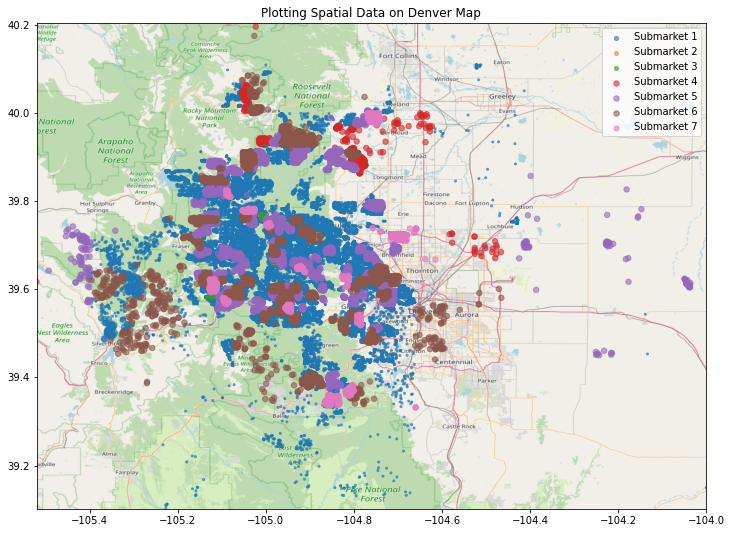

In [ ]:
denver = plt.imread('maps/denver_map.png')
X_sub = [res['X'][submarket == k] for k in range(K)]
BBox = (res['X'].longitude.min(), res['X'].longitude.max(),      
        res['X'].latitude.min(), res['X'].latitude.max())
        
fig, ax = plt.subplots(figsize = (12,10))

my_cmap = plt.cm.YlOrBr
my_cmap.set_under('w',1)

s_scale = 30

for k in range(K):
    ax.scatter(X_sub[k].longitude, X_sub[k].latitude, alpha= 0.6, s=s_scale * r[submarket == k,k], cmap=my_cmap, label='Submarket {}'.format(k+1))
ax.set_title('Plotting Spatial Data on Denver Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend()
ax.imshow(denver, zorder=0, extent = BBox, aspect= 'equal')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>